# Гарапко Даниил, группа 858641

# Лабораторная работа №1 “Линейная регрессия”

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import time

## Task 1

Набор данных ex1data1.txt представляет собой текстовый файл,
содержащий информацию о населении городов (первое число в строке) и
прибыли ресторана, достигнутой в этом городе (второе число в строке).
Отрицательное значение прибыли означает, что в данном городе ресторан
терпит убытки.

1. Загрузите набор данных ex1data1.txt из текстового файла.

In [0]:
task1_file_name = "Data\Lab 1\ex1data1.txt"
df_task1 = pd.read_csv(task1_file_name)
df_task1.columns = ['population', 'profit']

2. Постройте график зависимости прибыли ресторана от населения
города, в котором он расположен.

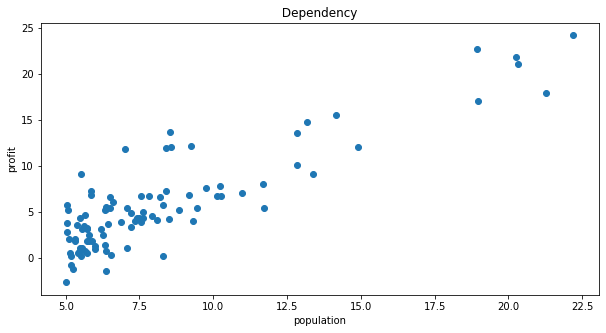

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df_task1['population'], df_task1['profit'])
ax.set(xlabel='population', ylabel='profit', title=' Dependency ')
plt.show()

3. Реализуйте функцию потерь J(θ) для набора данных ex1data1.txt.

In [0]:
lost_func = lambda t, x, y: (1 / (2*m)) * np.sum(np.square(np.dot(t.T, x).T - y).T)
update_func = lambda t, x, y, alpha: t - (1 / m) * alpha * np.dot((np.dot(t.T, x).T - y).T, x.T).T

4. Реализуйте функцию градиентного спуска для выбора параметров
модели. Постройте полученную модель (функцию) совместно с
графиком из пункта 2.

In [0]:
def optimize_by_gradient_descent(x, y, t, learning_rate=0.01, iterations=100):
    costs = []
    theta_history = []
    delta = -1
    step = 1
    for i in range(iterations):
        temp = update_func(t, x, y, learning_rate)
        cost = lost_func(temp, x, y).item()
        if costs:
            delta = cost - costs[-1]
        costs.append(cost)
        theta_history.append(temp[:, 0].tolist())
        step += 1
        if delta > 0:
            break
        t = temp
    plt.plot(np.array([range(1, step)]).T, costs)
    plt.show()
    return t, costs, theta_history

In [0]:
n = df_task1.shape[1] #po x 
m = df_task1.shape[0] #po y 
x = np.hstack((np.ones((m,1)), df_task1.iloc[:,:-1]))
x = x.T
y = np.array(df_task1.iloc[:,-1], subok=True, ndmin=2).T
theta = np.random.random((n, 1))

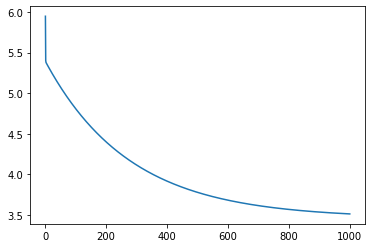

In [0]:
theta, costs, theta_history = optimize_by_gradient_descent(x, y, theta, 0.01, iterations=1000)

In [0]:
theta

array([[-3.40837033],
       [ 1.13310696]])

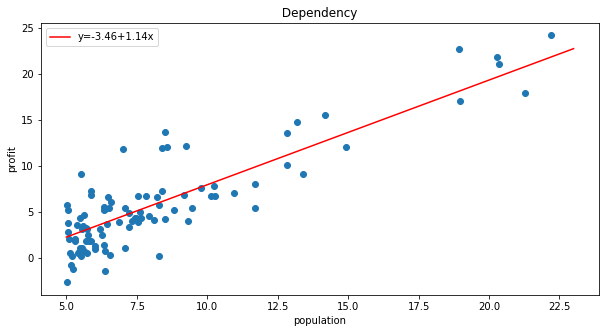

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df_task1['population'], df_task1['profit'])
ax.set(xlabel='population', ylabel='profit', title=' Dependency ')
x0 = np.linspace(5, 23, 100)
y0 = theta[0] + theta[1]*x0
plt.plot(x0, y0, '-r', label='y={0:.2f}+{1:.2f}x'.format(theta[0].item(), theta[1].item()))
plt.legend(loc='upper left')
plt.show()

5. Постройте трехмерный график зависимости функции потерь от
параметров модели (θ<sub>0</sub> и θ<sub>1</sub>) как в виде поверхности, так и в виде
изолиний (contour plot).

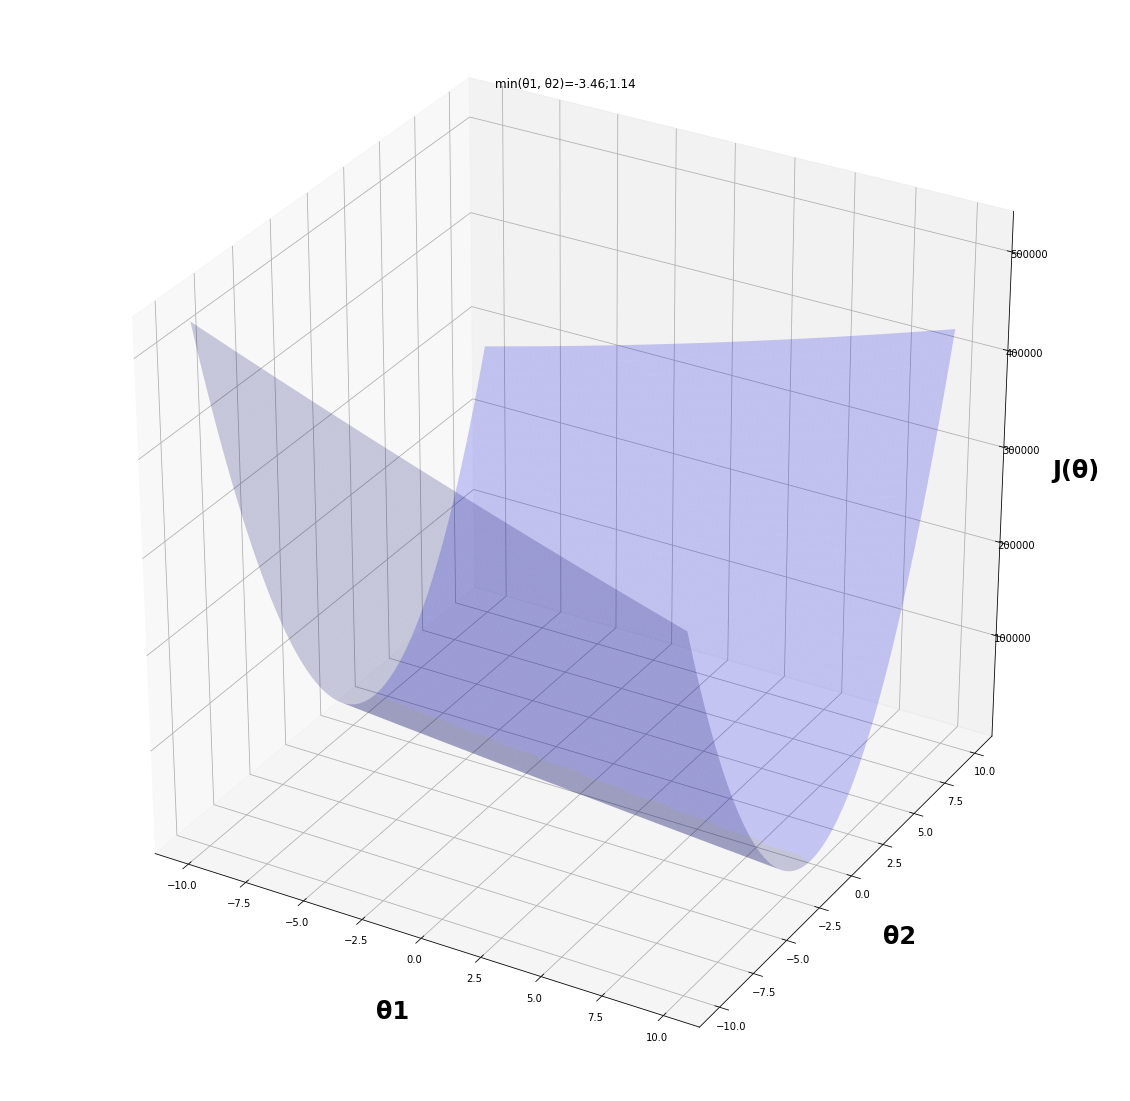

In [0]:
ms = np.linspace(-10.0,10.0, 100)
bs = np.linspace(-10.0,10.0, 100)

M, B = np.meshgrid(ms, bs)

zs=[]
for t in zip(np.ravel(M), np.ravel(B)):
    t = np.array(t)
    res = (1 / (2*m)) * np.sum(np.square(np.dot(t.T, x).T - y).T)
    zs.append(res)
zs = np.array(zs)
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.set_xlabel('θ1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('θ2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('J(θ)', labelpad=30, fontsize=24, fontweight='bold')
ax.set_title(' min(θ1, θ2)={0:.2f};{1:.2f} '.format(theta[0].item(), theta[1].item()))
ax.view_init()

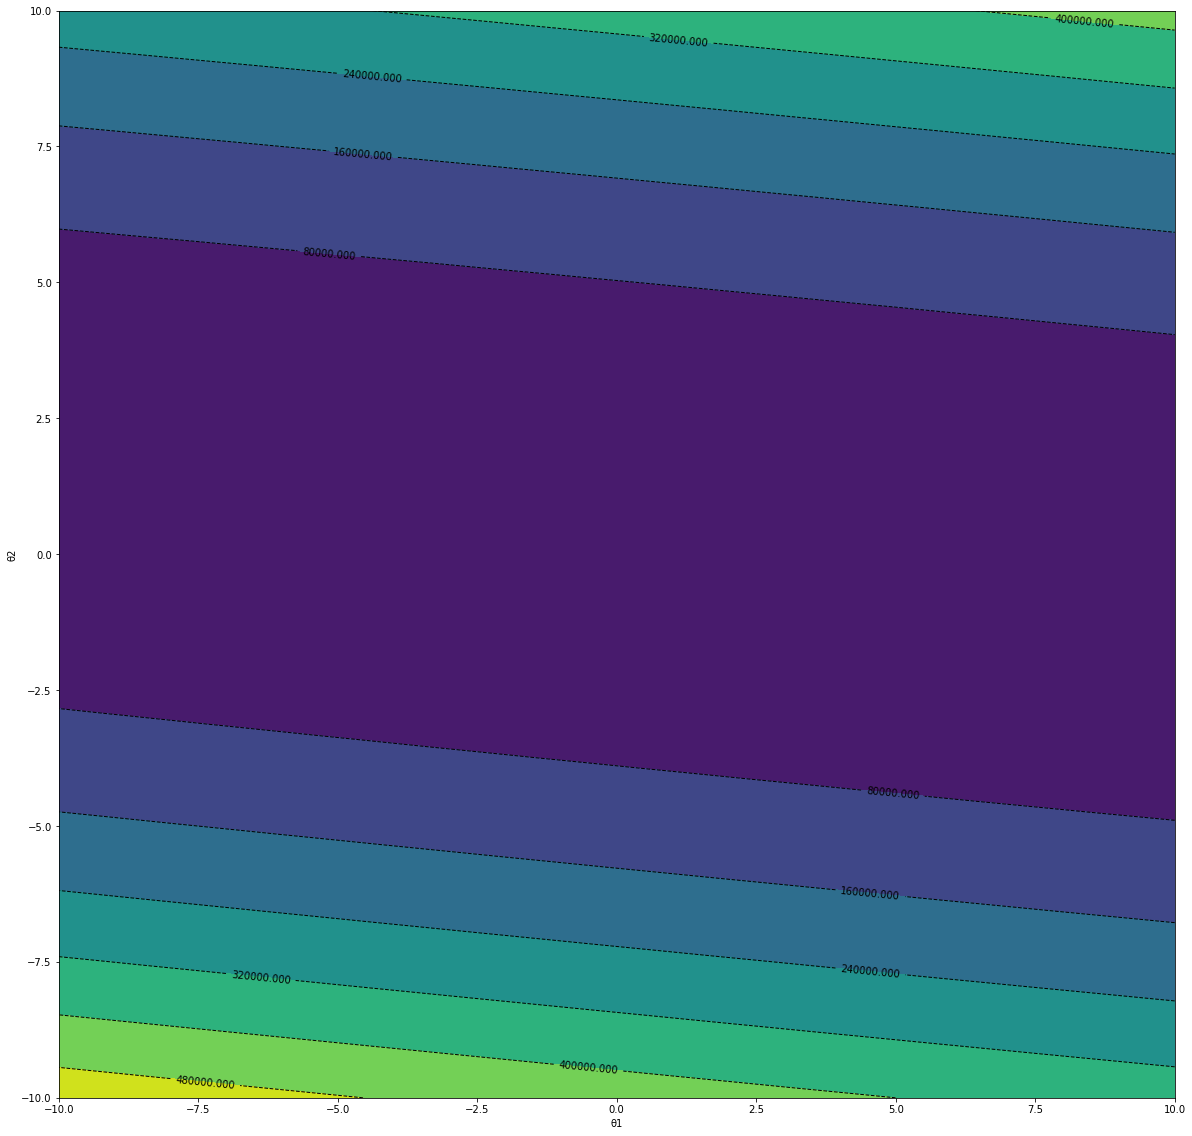

In [0]:
fig = plt.figure(figsize=(20, 20))
cp = plt.contour(M, B, Z, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(M, B, Z, )
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.show()

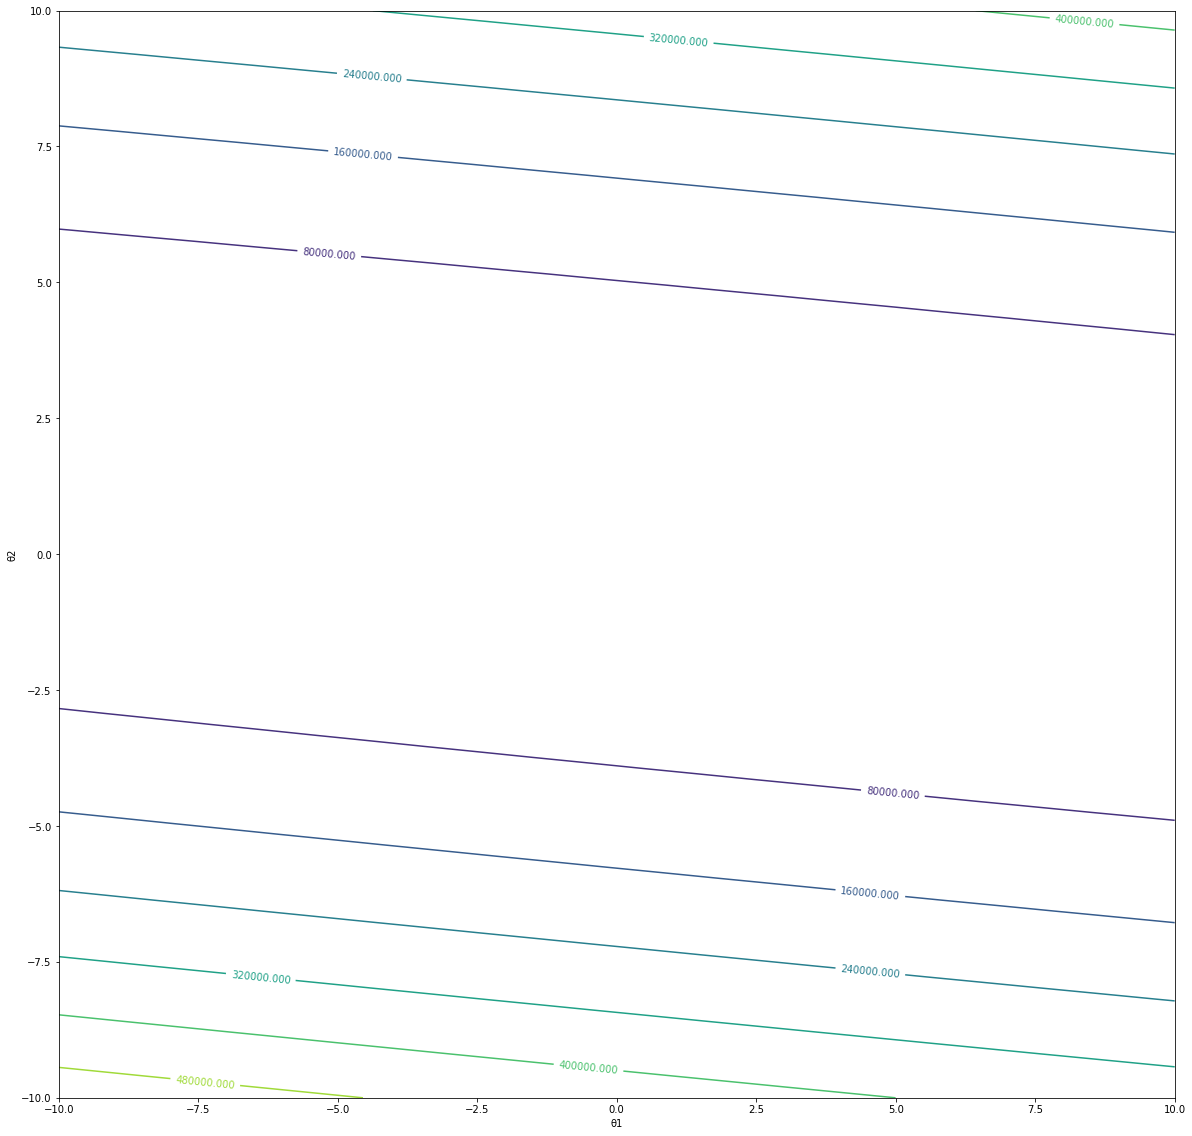

In [0]:
fig = plt.figure(figsize=(20, 20))
cp = plt.contour(M, B, Z)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.show()

## Task 2

Набор данных ex1data2.txt представляет собой текстовый файл,
содержащий информацию о площади дома в квадратных футах (первое число
в строке), количестве комнат в доме (второе число в строке) и стоимости
дома (третье число).

6. Загрузите набор данных ex1data2.txt из текстового файла.

In [0]:
task2_file_name = "Data\Lab 1\ex1data2.txt"
df_task2 = pd.read_csv(task2_file_name)
df_task2.columns = ['square', 'rooms', 'cost']

7. Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика

In [0]:
def normalize(data):
    min_value = np.min(data, axis=0)
    max_value = np.max(data, axis=0)
    average = np.average(data, axis=0)
    range_values = max_value - min_value
    return (data - average) / range_values, range_values, average

def denormalize_theta(t, range_values, average):
    t_denormalized = np.empty(shape=theta.shape)
    t_denormalized[0,0]=theta[0]-(theta[1:,0] * average / range_values).sum() #free member
    t_denormalized[1:,0]=theta[1:,0]/np.array(range_values)
    return t_denormalized

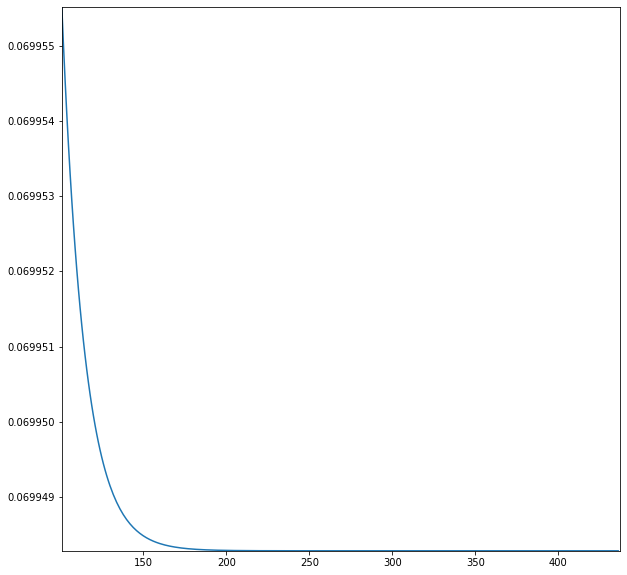

In [0]:
n = df_task2.shape[1] #po x 
m = df_task2.shape[0] #po y 
normalized_data, range_values, average = normalize(df_task2.iloc[:,:])
normalized_data = np.array(normalized_data)
ones = np.ones((m,1))
x = np.hstack((ones, normalized_data[:,:-1]))
x = x.T
y = np.array(normalized_data[:,-1], subok=True, ndmin=2).T
theta = np.random.random((n, 1))
theta = optimize_by_gradient_descent(x, y, theta, 2.0, 1000, is_plot=True)

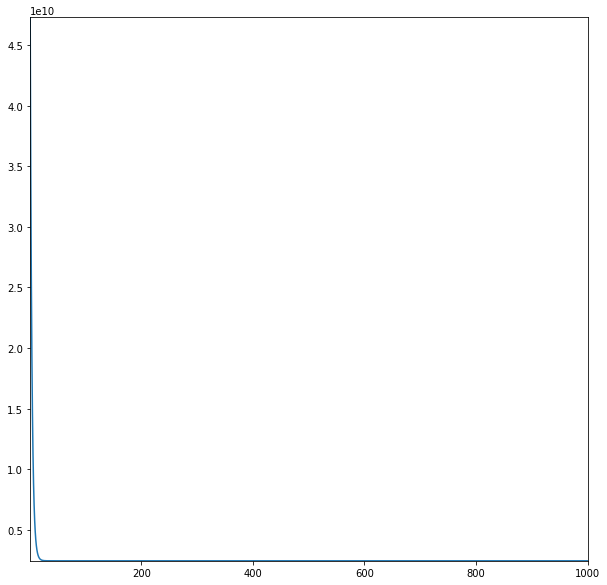

In [0]:
n = df_task2.shape[1] #po x 
m = df_task2.shape[0] #po y 
ones = np.ones((m,1))
x = np.hstack((ones, df_task2.iloc[:,:-1]))
x = x.T
y = np.array(df_task2.iloc[:,-1], subok=True, ndmin=2).T
theta = np.random.random((n, 1))
theta,_,_ = optimize_by_gradient_descent(x, y, theta, 0.4e-6, 1000, is_plot=True)

In [0]:
theta

array([[  4.03932645],
       [164.85646696],
       [  7.90291104]])

In [0]:
lost_func(theta, x, y).item()

2419893570.1688614

8. Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.

In [0]:
lost_func = lambda t, x, y: (1 / (2*m)) * np.sum(np.square(np.dot(t.T, x).T - y).T)
update_func = lambda t, x, y, alpha: t - (1 / m) * alpha * np.dot((np.dot(t.T, x).T - y).T, x.T).T

In [0]:
def optimize_by_gradient_descent(x, y, t, learning_rate=0.01, iterations=100, is_plot=False):
    costs = []
    theta_history = []
    delta = -1
    step = 1
    for i in range(iterations):
        temp = update_func(t, x, y, learning_rate)
        cost = lost_func(temp, x, y).item()
        if costs:
            delta = cost - costs[-1]
        costs.append(cost)
        theta_history.append(temp[:, 0].tolist())
        step += 1
        if delta > 0:
            break
        t = temp
    if is_plot:
        fig, ax = plt.subplots(figsize=(10, 10))
        costs = costs
        ax.set(xlim=(1, step), ylim=(min(costs), max(costs)))
        plt.plot(np.array([range(1, step)]).T, costs)
        plt.show()
    return t, costs, theta_history

In [0]:
n = df_task2.shape[1] #po x 
m = df_task2.shape[0] #po y 
ones = np.ones((m,1))
x = np.hstack((ones, df_task2.iloc[:,:-1]))
x = x.T
y = np.array(df_task2.iloc[:,-1], subok=True, ndmin=2).T
theta = np.random.random((n, 1))

9. Покажите, что векторизация дает прирост производительности.

In [0]:
def hypothesis_via_cycles(t, x):
    n, m = x.shape
    h = np.zeros((m, 1))
    for i in range(m):
        h_i = 0
        for j in range(n):
            h_i += t[j]*x[j, i]
        h[i]=h_i
    return h

In [0]:
def update_func_via_cycles(t, x, y, alpha):
    n, m = x.shape
    h = hypothesis_via_cycles(t, x)
    for j in range(n):
        temp_sum=0
        for i in range(m):
            temp_sum += (h[i] - y[i])*x[j, i]
        t[j] = t[j] - (1/m) * alpha * temp_sum
    return t

In [0]:
def lost_func_via_cycles(t, x, y):
    n, m = x.shape
    h = hypothesis_via_cycles(t, x)
    
    temp_sum=0.0
    for i in range(m):
        temp_sum += (h[i] - y[i])**2
    temp_sum=temp_sum/(2*m)
    return temp_sum

In [0]:
def optimize_by_gradient_descent_via_cycles(x, y, t, learning_rate=0.01, iterations=100, is_plot=False):
    costs = []
    theta_history = []
    delta = -1
    step = 1
    for i in range(iterations):
        temp = update_func_via_cycles(t, x, y, learning_rate)
        cost = lost_func_via_cycles(temp, x, y).item()
        if costs:
            delta = cost - costs[-1]
        costs.append(cost)
        theta_history.append(temp[:, 0].tolist())
        step += 1
        if delta > 0:
            break
        t = temp
    if is_plot:
        plt.plot(np.array([range(1, step)]).T, costs)
        plt.show()
    return t, costs, theta_history

In [0]:
theta_test = theta.copy()
iterations = np.arange(50, 1100,  100)
time_for_gradient_descent = []
for count_iterations in iterations:
    start = time.time()
    optimize_by_gradient_descent_via_cycles(x, y, theta_test, 1e-10, iterations=count_iterations)
    end = time.time()
    time1 = end - start
    
    start = time.time()
    optimize_by_gradient_descent(x, y, theta_test, 1e-10, iterations=count_iterations)
    end = time.time()
    time2 = end - start
    
    time_for_gradient_descent.append([time1, time2])
    
time_for_gradient_descent = np.array(time_for_gradient_descent)

In [0]:
time_for_gradient_descent

array([[1.32644415e-01, 9.97304916e-04],
       [2.56346941e-01, 1.99508667e-03],
       [4.35829163e-01, 4.98628616e-03],
       [6.16080523e-01, 5.98692894e-03],
       [7.69231081e-01, 8.94784927e-03],
       [9.48489189e-01, 8.97717476e-03],
       [1.09965014e+00, 1.09677315e-02],
       [1.37535858e+00, 1.39589310e-02],
       [1.44513893e+00, 1.49545670e-02],
       [1.60869908e+00, 1.59544945e-02],
       [1.86919284e+00, 1.79533958e-02]])

10.Попробуйте изменить параметр ɑ (коэффициент обучения). Как при
этом изменяется график функции потерь в зависимости от числа
итераций градиентного спуск? Результат изобразите в качестве
графика

In [0]:
n = df_task2.shape[1] #po x 
m = df_task2.shape[0] #po y 
normalized_data, range_values, average = normalize(df_task2.iloc[:,:])
normalized_data = np.array(normalized_data)
ones = np.ones((m,1))
x = np.hstack((ones, normalized_data[:,:-1]))
x = x.T
y = np.array(normalized_data[:,-1], subok=True, ndmin=2).T
theta = np.random.random((n, 1))

$$
\alpha = 10^-5
$$

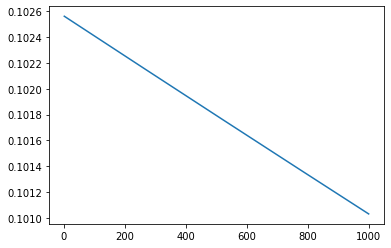

In [0]:
_ = optimize_by_gradient_descent(x, y, theta, 1e-5, 1000, is_plot=True)

$$
\alpha = 0.1
$$

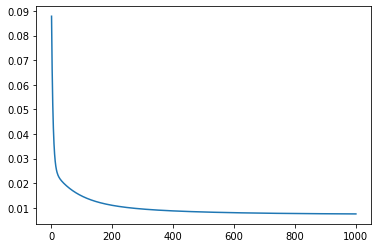

In [0]:
_ = optimize_by_gradient_descent(x, y, theta, 0.1, 1000, is_plot=True)

$$
\alpha = 1
$$

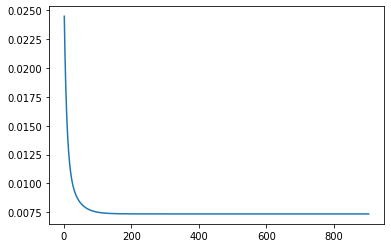

In [0]:
_ = optimize_by_gradient_descent(x, y, theta, 1, 1000, is_plot=True)

$$
\alpha = 10
$$

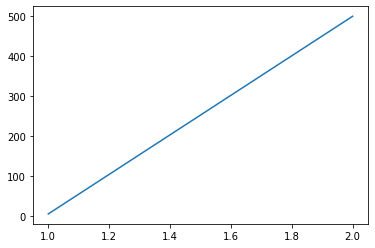

In [0]:
_ = optimize_by_gradient_descent(x, y, theta, 10, 1000, is_plot=True)

11.Постройте модель, используя аналитическое решение, которое может
быть получено методом наименьших квадратов. Сравните результаты

In [0]:
n = df_task1.shape[1] #po x 
m = df_task1.shape[0] #po y 
x = np.hstack((np.ones((m,1)), df_task1.iloc[:,:-1]))
x = x.T
y = np.array(df_task1.iloc[:,-1], subok=True, ndmin=2).T
theta = np.random.random((n, 1))

In [0]:
np.dot(np.dot(np.linalg.pinv(np.dot(x.T, x)), x.T).T, y)

array([[-4.21150401],
       [ 1.21354725]])

In [0]:
lost_func(np.dot(np.dot(np.linalg.pinv(np.dot(x.T, x)), x.T).T, y), x, y).item()

3.4595819031580044

In [0]:
theta0, _, _ = optimize_by_gradient_descent(x, y, theta, 1e-2, 1000, is_plot=False)
theta0

array([[-3.43866505],
       [ 1.13614122]])

In [0]:
lost_func(theta0, x, y)

3.5140549140701998